### Human Activity Recognition

In [1]:
# found interesting dataset to classify time series data
# Human Activity Recognition (HAR): ts data from 3-axial accelerometer and gyroscope sensors (50 Hz sampling rate)
# sensors in smartphone worn on waist of test subjects as part of a research experiment 
# data at: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [2]:
# short summary of expt/data 
# 30 volunteers wearing devices, 70% randomly assigned to training, rest to test dataset
# sensory signals pre-processed by applying noise filters
# then sampled in fixed-width sliding windows of 2.56 sec & 50% overlap (128 readings/window)
# Sensor acceleration data has gravitational and body motion components 
# these separated by Butterworth low-pass filter into body acceleration and gravity
# gravitational force assumed to have only low frequency components, therefore filter with 0.3 Hz cutoff was used
# for each window, a vector of features was obtained by calculating variables from time and freq domain 
# (check features.info.txt for details)

In [3]:
# for each record provided:
# triaxial acceleration from accelerometer (total acceleration) and estimated body acceleration
# triaxial angular velocity from gyroscope
# a 561-feature vector with time and freq domain variables
# its activity label
# an identifier of subject who carried out the expt 

In [4]:
# Dataset included these files:
# readme.txt - stuff from above
# features.info.txt - list of all features
# activity_labels.txt - links class label with their activity name
# train/test data + associated labels files 

In [5]:
# following analysis template as per: https://github.com/jeandeducla/ML-Time-Series
# this repo uses different approaches to ts classification using ml tools 
# in addition to testing different ml models (dl, nn, svm etc), two different types of inputs also tested
# these are raw ts data - or using features extracted from ts (statistical measures, freq domain features etc)
# HAR data for 6 different activities: walking, walking upstairs, walking downstairs, sitting, standing, lying
# each sample in dataet is a 2.56 s window sampled at 50 Hz
# which results in 6 x 128 readings per sample 
# ie 3 accelerometer axes x, y, z & 3 gyroscope axes x, y z
# in this repo, we will only use the 3 accelerometer axes x, y, z 
# lets try and plot a sample of each as in the repo info page 

In [6]:
import pandas as pd

In [7]:
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt')
X_train

2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000000e+000 -1.0000000e+000  1.1380614e-001 -5.9042500e-001  5.9114630e-001 -5.9177346e-001  5.9246928e-001 -7.4544878e-001  7.2086167e-001 -7.1237239e-001  7.1130003e-001 -9.9511159e-001  9.9567491e-001 -9.9566759e-001  9.9165268e-001  5.7022164e-001  4.3902735e-001  9.8691312e-001  7.7996345e-002  5.0008031e-003 -6.7830808e-002 -9.9351906e-001 -9.8835999e-001 -9.9357497e-001 -9.9448763e-001 -9.8620664e-001 -9.9281835e-001 -9.8518010e-001 -9.9199423e-001 -9.9311887e-001  9.8983471e-001  9.9195686e-001  9.9051920e-001 -9.9352201e-001 -9.9993487e-001 -9.9982045e-001 -9.9987846e-001 -9.9436404e-001 -9.8602487e-001 -9.8923361e-001 -8.1994925e-001 -7.9304645e-001 -8.8885295e-001  1.0000000e+000 -2.2074703e-001  6.3683075e-001  3.8764356e-001  2.4140146e-001 -5.2252848e-002  2.6417720e-001  3.7343945e-001  3.4177752e-001 -5.6979119e-001  2.6539882e-001 -4.7787489e-001 -3.8530050e-001  3.3643943e-002 -1.2651082e-001 -6.1008489e-003 -3.1364791e-002  1.0772540e-001 -9.8531027e-001 -9.7662344e-001 -9.9220528e-001 -9.8458626e-001 -9.7635262e-001 -9.9236164e-001 -8.6704374e-001 -9.3378602e-001 -7.4756618e-001  8.4730796e-001  9.1489534e-001  8.3084054e-001 -9.6718428e-001 -9.9957831e-001 -9.9935432e-001 -9.9976339e-001 -9.8343808e-001 -9.7861401e-001 -9.9296558e-001  8.2631682e-002  2.0226765e-001 -1.6875669e-001  9.6323236e-002 -2.7498511e-001  4.9864419e-001 -2.2031685e-001  1.0000000e+000 -9.7297139e-001  3.1665451e-001  3.7572641e-001  7.2339919e-001 -7.7111201e-001  6.9021323e-001 -3.3183104e-001  7.0958377e-001  1.3487336e-001  3.0109948e-001 -9.9167400e-002 -5.5517369e-002 -6.1985797e-002 -9.9211067e-001 -9.9251927e-001 -9.9205528e-001 -9.9216475e-001 -9.9494156e-001 -9.9261905e-001 -9.9015585e-001 -9.8674277e-001 -9.9204155e-001  9.9442876e-001  9.9175581e-001  9.8935195e-001 -9.9445335e-001 -9.9993755e-001 -9.9995350e-001 -9.9992294e-001 -9.9229974e-001 -9.9693892e-001 -9.9224298e-001 -5.8985096e-001 -6.8845905e-001 -5.7210686e-001  2.9237634e-001 -3.6199802e-001  4.0554269e-001 -3.9006951e-002  9.8928381e-001 -4.1456048e-001  3.9160251e-001  2.8225087e-001  9.2726984e-001 -5.7237001e-001  6.9161920e-001  4.6828982e-001 -1.3107697e-001 -8.7159695e-002  3.3624748e-001 -9.5943388e-001 -9.5055150e-001 -9.5799295e-001 -9.4630524e-001 -9.9255572e-001 -9.5943388e-001 -9.9849285e-001 -9.5763740e-001 -2.3258164e-001 -1.7317874e-001 -2.2896660e-002  9.4831568e-002  1.9181715e-001 -9.5943388e-001 -9.5055150e-001 -9.5799295e-001 -9.4630524e-001 -9.9255572e-001 -9.5943388e-001 -9.9849285e-001 -9.5763740e-001 -2.3258164e-001 -1.7317874e-001 -2.2896660e-002  9.4831568e-002  1.9181715e-001 -9.9330586e-001 -9.9433641e-001 -9.9450037e-001 -9.9278399e-001 -9.9120847e-001 -9.9330586e-001 -9.9989188e-001 -9.9293370e-001 -8.6341476e-001  2.8308522e-001 -2.3730869e-001 -1.0543219e-001 -3.8212313e-002 -9.6895908e-001 -9.6433518e-001 -9.5724477e-001 -9.7505986e-001 -9.9155366e-001 -9.6895908e-001 -9.9928646e-001 -9.4976582e-001  7.2579035e-002  5.7251142e-001 -7.3860219e-001  

In [8]:
# wtf is this header business? 

In [9]:
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt')
y_train

,5
0,5
1,5
2,5
3,5
4,5
...,...
7346,2
7347,2
7348,2
7349,2


In [10]:
# the repo chap is using numpy to load data! ok lets try that

In [11]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



In [12]:
body_acc_x_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_acc_x_train.txt')
body_acc_x_train
# ah cool its a numpy array

array([[ 1.808515e-04,  1.013856e-02,  9.275574e-03, ..., -1.147484e-03,
        -2.222655e-04,  1.575500e-03],
       [ 1.093752e-03,  4.550077e-03,  2.879173e-03, ..., -4.646144e-03,
        -2.941333e-03, -1.598751e-03],
       [ 3.531266e-03,  2.285063e-03, -4.197538e-04, ...,  1.245999e-03,
         3.116783e-03,  2.177658e-03],
       ...,
       [-2.267175e-01, -1.778169e-01, -1.508691e-01, ..., -2.949353e-01,
        -2.434030e-01, -2.152148e-01],
       [-6.480597e-02, -7.993300e-02, -6.834966e-02, ..., -3.150159e-01,
        -3.307374e-01, -2.723475e-01],
       [-1.944707e-01, -1.738025e-01, -1.275446e-01, ..., -7.190685e-02,
        -1.422088e-01, -1.709989e-01]])

In [13]:
body_acc_x_train.shape

(7352, 128)

In [14]:
body_acc_x_train[0].shape

(128,)

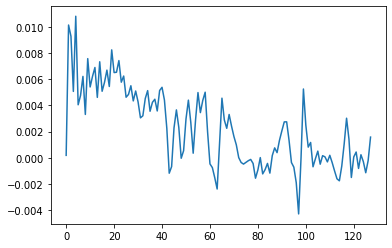

In [15]:
plt.plot(body_acc_x_train[0])

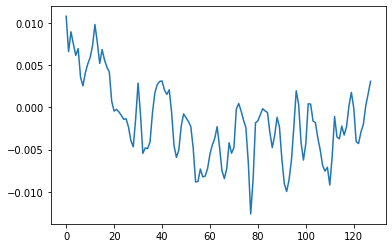

In [16]:
body_acc_y_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_acc_y_train.txt')
plt.plot(body_acc_y_train[0])

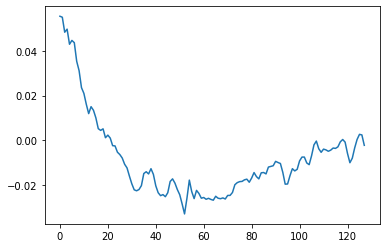

In [17]:
body_acc_z_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_acc_z_train.txt')
plt.plot(body_acc_z_train[0])

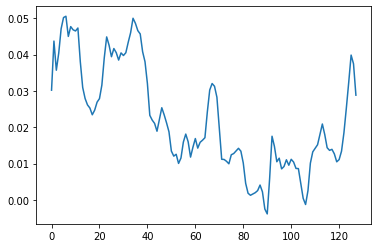

In [18]:
body_gyro_x_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_gyro_x_train.txt')
plt.plot(body_gyro_x_train[0])

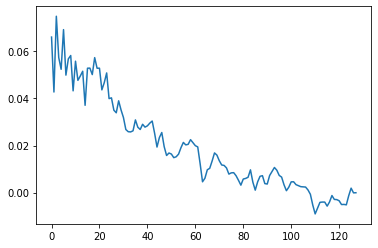

In [19]:
body_gyro_y_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_gyro_y_train.txt')
plt.plot(body_gyro_y_train[0])

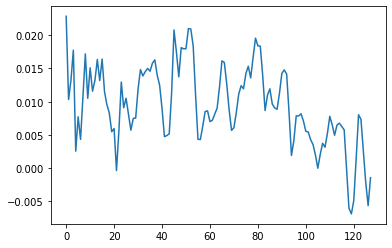

In [20]:
body_gyro_z_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/body_gyro_z_train.txt')
plt.plot(body_gyro_z_train[0])

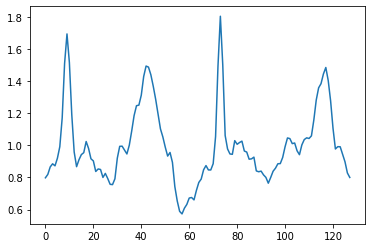

In [21]:
total_acc_x_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/total_acc_x_train.txt')
plt.plot(total_acc_x_train[-1])

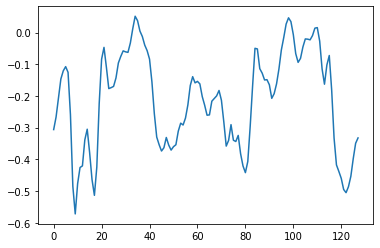

In [22]:
total_acc_y_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/total_acc_y_train.txt')
plt.plot(total_acc_y_train[-1])

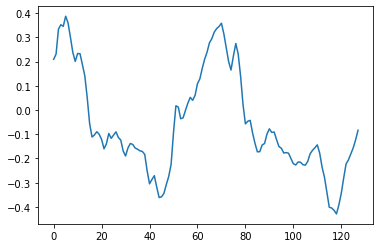

In [24]:
total_acc_z_train = np.loadtxt('./UCI HAR Dataset/train//Inertial Signals/total_acc_z_train.txt')
plt.plot(total_acc_z_train[-1])

In [25]:
# there seems to be a better tutorial here: 
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [ ]:
# a few more notes:
# raw data is not available but instead a pre-processed version of dataset
# pre-processed accelerometer and gyroscope using noise filters
# splitting data into fixed windows of 2.56 sec (128 data points) with 50% overlap
# feature engg was applied to the window data and a copy of the data with these engg features are available
# a no. of time and freq features commonly used in field of human activity recog was extracted for each window
# result was a 561 element vector of features
# data split 70/30 train/test ie 21 subjects for train & 9 for test
# expt results with SVM intended for use on smartphone (eg fixed point arithmetic) gave 89% accuracy on test set
# this was similar to an unmodified SVM implementation
# downloaded and saved files into HARDataset folder

# this tutorial is to develop a 1D CNN 